In [ ]:
import pickle
import numpy as np
from scipy.stats import mannwhitneyu
from sklearn.metrics import f1_score

In [ ]:
save_dir = '/content/drive/MyDrive/PhD/Results/bay_cofe_new/logistic_regression/'
with open(save_dir + "TUANDROMD_dataset.pkl", "rb") as f:
    results = pickle.load(f)

methods = [m for m in results.keys() if m != "BayCOFE"]

# Converting lists to numpy arrays for BayCOFE baseline
entropy_bay = np.array(results["BayCOFE"]["entropy"], dtype=float)
acc_bay     = np.array(results["BayCOFE"]["accuracy"], dtype=float)
other_methods = ["CoFE", "RFE", "SFS", "SBS", "Bidirectional"]
print("=== Mann–Whitney U tests (BayCoFE vs Others) ===\n")
for m in methods:
    entropy_other = np.array(results[m]["entropy"], dtype=float)
    acc_other     = np.array(results[m]["accuracy"], dtype=float)

    # ΔEntropy: positive = BayCoFE lower entropy (more stable)
    delta_entropy = entropy_other - entropy_bay

    # ΔAccuracy: positive = BayCoFE higher accuracy
    delta_acc = acc_other - acc_bay

    # Mann–Whitney tests
    u_entropy, p_entropy = mannwhitneyu(entropy_other, entropy_bay, alternative='greater')
    u_acc, p_acc         = mannwhitneyu(acc_bay, acc_other, alternative='greater')

    u_delta, p_delta = mannwhitneyu(delta_entropy, delta_acc, alternative='greater')

    print(f"Method: {m}")
    #print(f"  Median ΔEntropy (other - Bay): {np.nanmedian(delta_entropy):.4f}  p={p_entropy:.4g}")
    #print(f"  Median ΔAcc (Bay - other):     {np.nanmedian(delta_acc):.4f}  p={p_acc:.4g}")
    print("U delta: ", u_delta, " P delta",p_delta)

=== Mann–Whitney U tests (BayCoFE vs Others) ===

Method: CoFE
U delta:  158.0  P delta 0.8748627110352403
Method: RFE
U delta:  378.0  P delta 7.807743580533807e-07
Method: SFS
U delta:  375.0  P delta 1.1739886684752849e-06
Method: SBS
U delta:  383.0  P delta 3.964551193429771e-07
Method: Bidirectional
U delta:  356.0  P delta 1.2957284408565602e-05


breast_cancer.pkl
Method: CoFE
  Entropy (median): 0.0000, p = 0.01256
  Accuracy (median): 0.0000, p = 0.8817
  U delta: 600.0, P delta: 0.0027143092867593986

Method: RFE
  Entropy (median): 0.2228, p = 9.946e-10
  Accuracy (median): -0.0035, p = 0.935
  U delta: 846.5, P delta: 2.0450778218103745e-09

Method: SFS
  Entropy (median): 0.2669, p = 2.292e-11
  Accuracy (median): -0.0035, p = 0.8762
  U delta: 878.0, P delta: 1.273390944930389e-10

Method: SBS
  Entropy (median): 0.2249, p = 2.551e-11
  Accuracy (median): -0.0035, p = 0.8959
  U delta: 854.0, P delta: 1.1724775913923442e-09

Method: Bidirectional
  Entropy (median): 0.2477, p = 2.292e-11
  Accuracy (median): -0.0053, p = 0.9079
  U delta: 880.0, P delta: 1.047915288311667e-10



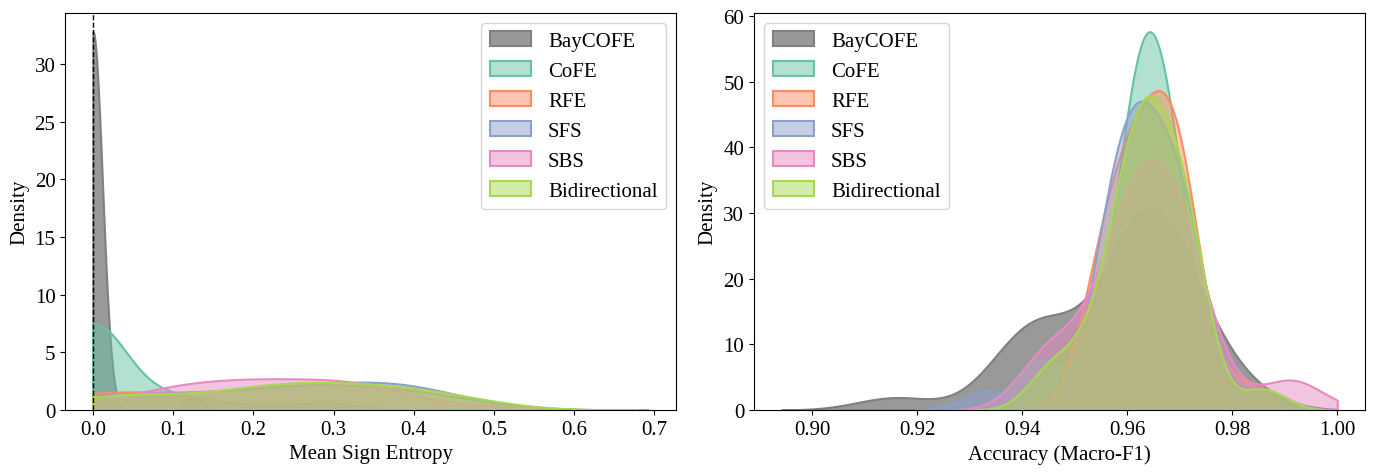

phishing_dataset.pkl
Method: CoFE
  Entropy (median): 0.0000, p = 0.01305
  Accuracy (median): -0.0013, p = 0.8646
  U delta: 185.5, P delta: 0.0009429106637389179

Method: RFE
  Entropy (median): 0.0677, p = 2.254e-06
  Accuracy (median): -0.0033, p = 0.9998
  U delta: 225.0, P delta: 1.6916697063271091e-06

Method: SFS
  Entropy (median): 0.1401, p = 7.902e-07
  Accuracy (median): -0.0016, p = 0.8195
  U delta: 225.0, P delta: 1.6916697063271091e-06

Method: SBS
  Entropy (median): 0.0996, p = 9.78e-07
  Accuracy (median): -0.0038, p = 0.9982
  U delta: 225.0, P delta: 1.6789992476286239e-06

Method: Bidirectional
  Entropy (median): 0.1179, p = 7.902e-07
  Accuracy (median): -0.0025, p = 0.9662
  U delta: 225.0, P delta: 1.6916697063271091e-06



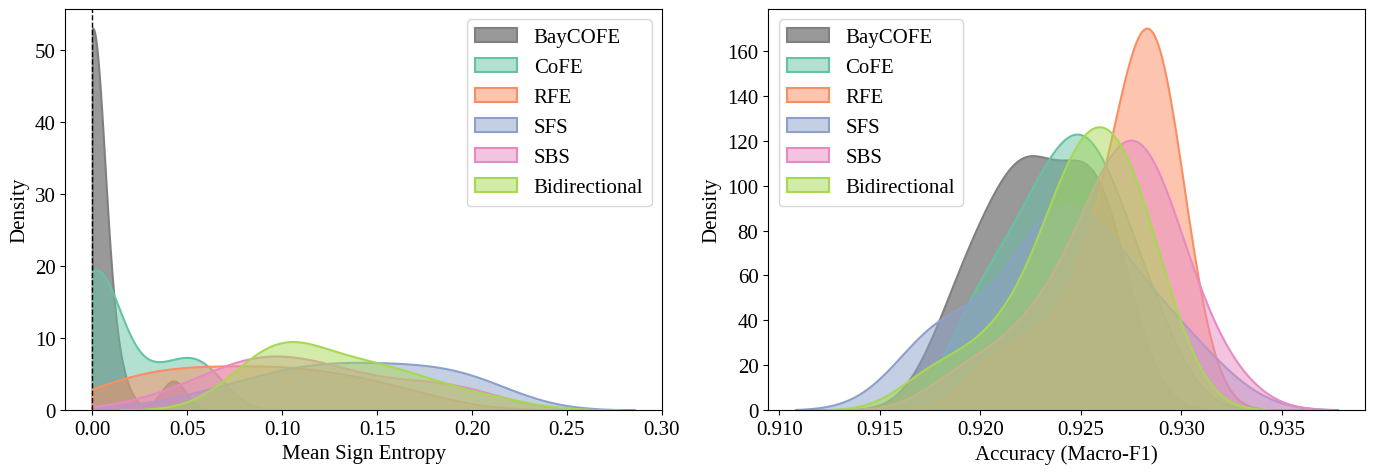

TUANDROMD_dataset.pkl
Method: CoFE
  Entropy (median): -0.0022, p = 0.591
  Accuracy (median): -0.0013, p = 0.8886
  U delta: 199.0, P delta: 0.5161834544895544

Method: RFE
  Entropy (median): 0.1223, p = 1.518e-06
  Accuracy (median): -0.0101, p = 1
  U delta: 381.0, P delta: 5.187893037698957e-07

Method: SFS
  Entropy (median): 0.0568, p = 5.752e-05
  Accuracy (median): 0.0022, p = 0.2755
  U delta: 373.0, P delta: 1.5296559357380684e-06

Method: SBS
  Entropy (median): 0.1348, p = 6.09e-08
  Accuracy (median): -0.0108, p = 1
  U delta: 400.0, P delta: 3.38823691698822e-08

Method: Bidirectional
  Entropy (median): 0.0609, p = 5.148e-05
  Accuracy (median): 0.0022, p = 0.3932
  U delta: 357.0, P delta: 1.149203128544028e-05



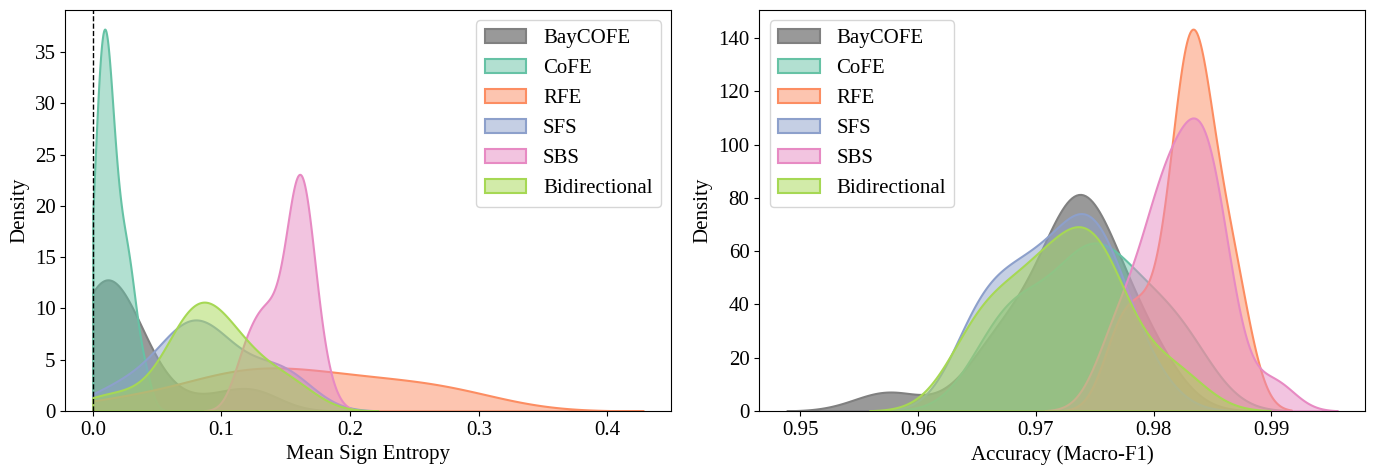

In [ ]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu
import matplotlib as mpl
# ---------------- Appearance ----------------

mpl.rcParams['font.family'] = 'Liberation Serif'
mpl.rcParams['font.size'] = 15
mpl.rcParams['font.weight'] = 'normal'


# --- Load results ---
save_dir = '/content/drive/MyDrive/PhD/Results/bay_cofe_new/logistic_regression/'


pkl_filenames = ['breast_cancer.pkl', 'phishing_dataset.pkl', 'TUANDROMD_dataset.pkl']

for pkl_filename in pkl_filenames:
  print(pkl_filename)
  with open(save_dir + pkl_filename, "rb") as f:
      results = pickle.load(f)

  methods = [m for m in results.keys() if m != "BayCOFE"]

  # Baseline arrays
  entropy_bay = np.array(results["BayCOFE"]["entropy"], dtype=float)
  acc_bay     = np.array(results["BayCOFE"]["accuracy"], dtype=float)

  # For plotting
  fig, axes = plt.subplots(1, 2, figsize=(14, 5))
  colors = sns.color_palette("Set2", len(methods))

  # Plot BayCOFE baseline (as KDE of raw values)
  sns.kdeplot(entropy_bay, ax=axes[0], label="BayCOFE", fill=True, alpha=0.8, linewidth=1.5, color="grey", clip=(0,1))
  sns.kdeplot(acc_bay, ax=axes[1], label="BayCOFE", fill=True, alpha=0.8, linewidth=1.5, color="grey", clip=(0,1))

  # Loop over all other methods
  for i, m in enumerate(methods):
      entropy_other = np.array(results[m]["entropy"], dtype=float)
      acc_other     = np.array(results[m]["accuracy"], dtype=float)

      # Compute deltas
      delta_entropy = entropy_other - entropy_bay  # Positive = BayCOFE more stable
      delta_acc     = acc_bay - acc_other          # Positive = BayCOFE more accurate

      # Mann–Whitney U tests
      u_entropy, p_entropy = mannwhitneyu(entropy_other, entropy_bay, alternative='greater')
      u_acc, p_acc         = mannwhitneyu(acc_bay, acc_other, alternative='greater')
      u_delta, p_delta     = mannwhitneyu(delta_entropy, delta_acc, alternative='greater')

      print(f"Method: {m}")
      print(f"  Entropy (median): {np.nanmedian(delta_entropy):.4f}, p = {p_entropy:.4g}")
      print(f"  Accuracy (median): {np.nanmedian(delta_acc):.4f}, p = {p_acc:.4g}")
      print(f"  U delta: {u_delta}, P delta: {p_delta}\n")

      # KDE of differences
      sns.kdeplot(entropy_other, ax=axes[0], label=m, fill=True, alpha=0.5, linewidth=1.5, color=colors[i], clip=(0,1))
      sns.kdeplot(acc_other, ax=axes[1], label=m, fill=True, alpha=0.5, linewidth=1.5, color=colors[i], clip=(0,1))

  # Plot formatting
  #axes[0].set_title("KDE of Sign Entropy")
  axes[0].axvline(0, linestyle='--', color='black', linewidth=1)
  axes[0].set_xlabel("Mean Sign Entropy", fontsize=15)
  axes[0].set_ylabel("Density", fontsize=15)
  axes[0].legend()

  #axes[1].set_title("KDE of Accuracy")
  #axes[1].axvline(0, linestyle='--', color='black', linewidth=1)
  axes[1].set_xlabel("Accuracy (Macro-F1)", fontsize=15)
  axes[1].set_ylabel("Density", fontsize=15)
  axes[1].legend()

  plt.tight_layout()
  plt.show()

In [2]:
!pip install cliffs_delta

breast_cancer.pkl
Method: CoFE
  U delta: 600.0, P delta: 0.0027143092867593986

  Cliff's delta: (0.3333333333333333, 'medium'), P delta: 0.0027143092867593986

Method: RFE
  U delta: 846.5, P delta: 2.0450778218103745e-09

  Cliff's delta: (0.8811111111111111, 'large'), P delta: 2.0450778218103745e-09

Method: SFS
  U delta: 878.0, P delta: 1.273390944930389e-10

  Cliff's delta: (0.9511111111111111, 'large'), P delta: 1.273390944930389e-10

Method: SBS
  U delta: 854.0, P delta: 1.1724775913923442e-09

  Cliff's delta: (0.8977777777777778, 'large'), P delta: 1.1724775913923442e-09

Method: Bidirectional
  U delta: 880.0, P delta: 1.047915288311667e-10

  Cliff's delta: (0.9555555555555556, 'large'), P delta: 1.047915288311667e-10

phishing_dataset.pkl
Method: CoFE
  U delta: 185.5, P delta: 0.0009429106637389179

  Cliff's delta: (0.6488888888888888, 'large'), P delta: 0.0009429106637389179

Method: RFE
  U delta: 225.0, P delta: 1.6916697063271091e-06

  Cliff's delta: (1.0, 'large

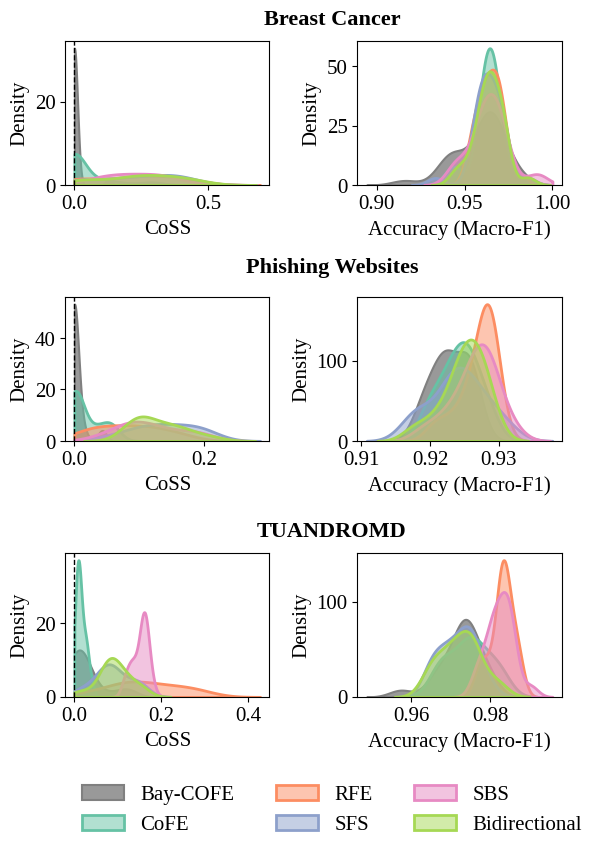

In [3]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu
import matplotlib as mpl
from cliffs_delta import cliffs_delta
# ---------------- Appearance ----------------
mpl.rcParams['font.family'] = 'Liberation Serif'
mpl.rcParams['font.size'] = 15
mpl.rcParams['font.weight'] = 'normal'

# --- Load results ---
save_dir = '/content/drive/MyDrive/PhD/Results/bay_cofe_new/logistic_regression/'
pkl_filenames = ['breast_cancer.pkl', 'phishing_dataset.pkl', 'TUANDROMD_dataset.pkl']
dataset_names = ['Breast Cancer', 'Phishing Websites', 'TUANDROMD']

# Prepare global 3x2 subplot layout
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(6.5, 8))
colors = sns.color_palette("Set2", 5)  # max 5 other methods assumed

# To store legend info
legend_handles = None
legend_labels = None

for row_idx, pkl_filename in enumerate(pkl_filenames):
    print(pkl_filename)
    with open(save_dir + pkl_filename, "rb") as f:
        results = pickle.load(f)

    methods = [m for m in results.keys() if m != "BayCOFE"]

    entropy_bay = np.array(results["BayCOFE"]["entropy"], dtype=float)
    acc_bay     = np.array(results["BayCOFE"]["accuracy"], dtype=float)

    ax_entropy = axes[row_idx, 0]
    ax_acc = axes[row_idx, 1]

    # Plot BayCOFE baseline
    p1 = sns.kdeplot(entropy_bay, ax=ax_entropy, label="Bay-COFE", fill=True, alpha=0.8, linewidth=1.5, color="grey", clip=(0,1))
    p2 = sns.kdeplot(acc_bay, ax=ax_acc, label="Bay-COFE", fill=True, alpha=0.8, linewidth=1.5, color="grey", clip=(0,1))

    for i, m in enumerate(methods):
        entropy_other = np.array(results[m]["entropy"], dtype=float)
        acc_other     = np.array(results[m]["accuracy"], dtype=float)

        delta_entropy = entropy_other - entropy_bay
        delta_acc     = acc_bay - acc_other

        u_entropy, p_entropy = mannwhitneyu(entropy_other, entropy_bay, alternative='greater')
        u_acc, p_acc         = mannwhitneyu(acc_bay, acc_other, alternative='greater')
        u_delta, p_delta     = mannwhitneyu(delta_entropy, delta_acc, alternative='greater')

        print(f"Method: {m}")
        #print(f"  ΔEntropy (median): {np.nanmedian(delta_entropy):.4f}, p = {p_entropy:.4g}")
        #print(f"  ΔAccuracy (median): {np.nanmedian(delta_acc):.4f}, p = {p_acc:.4g}")
        print(f"  U delta: {u_delta}, P delta: {p_delta}\n")
        print(f"  Cliff's delta: {cliffs_delta(delta_entropy, delta_acc)}, P delta: {p_delta}\n")

        p3 = sns.kdeplot(entropy_other, ax=ax_entropy, label=m, fill=True, alpha=0.5, linewidth=2, color=colors[i], clip=(0,1))
        p4 = sns.kdeplot(acc_other, ax=ax_acc, label=m, fill=True, alpha=0.5, linewidth=2, color=colors[i], clip=(0,1))

    # Formatting entropy plot
    ax_entropy.set_xlabel("CoSS", fontweight='normal')
    ax_entropy.set_ylabel("Density", fontweight='normal')
    ax_entropy.axvline(0, linestyle='--', color='black', linewidth=1)

    # Formatting accuracy plot
    #ax_acc.set_title(f"{dataset_names[row_idx]} - Accuracy", fontsize=14)
    ax_acc.set_xlabel("Accuracy (Macro-F1)", fontweight='normal')
    ax_acc.set_ylabel("Density", fontweight='normal')

    # Collect handles from only first entropy subplot
    #fig.text(0.05, 0.86 - row_idx * 0.32, dataset_names[row_idx], va='center', rotation='vertical', fontsize=16, fontweight='normal')
    # Add dataset name centered above the row (spaced depending on the row index)
    top_y_positions = [0.98, 0.67, 0.34]  # approximate y-coordinates for rows 0,1,2
    fig.text(0.6, top_y_positions[row_idx], dataset_names[row_idx], ha='center', va='bottom', fontsize=16, fontweight='bold')

    if row_idx == 0:
        legend_handles, legend_labels = ax_entropy.get_legend_handles_labels()

    # Remove legends from all subplots
    ax_entropy.legend().remove()
    ax_acc.legend().remove()

# Add one combined legend at the bottom
#fig.legend(legend_handles, legend_labels, loc='lower center', ncol=len(legend_labels), frameon=False, bbox_to_anchor=(0.5, -0.01))
fig.legend(
    legend_handles,
    legend_labels,
    loc='lower center',
    ncol=3,                     # 3 columns
    frameon=False,
    bbox_to_anchor=(0.6, -0.05) # move it a bit lower so it doesn’t overlap the plot
)

plt.tight_layout(h_pad=2.5, rect=[0.07, 0.05, 1, 1])  # Leaves space on the left for text
#fig.subplots_adjust(hspace=0.6, wspace=0.3, left=0.07, bottom=0.1, top=0.95, right=0.98)

#plt.savefig("classification_ent_acc.png", format='png', dpi=600, bbox_inches='tight')

plt.savefig("classification_ent_acc.pdf", format='pdf', bbox_inches='tight', dpi=600)
#plt.savefig("classification_ent_acc.pgf", bbox_inches='tight')
plt.show()

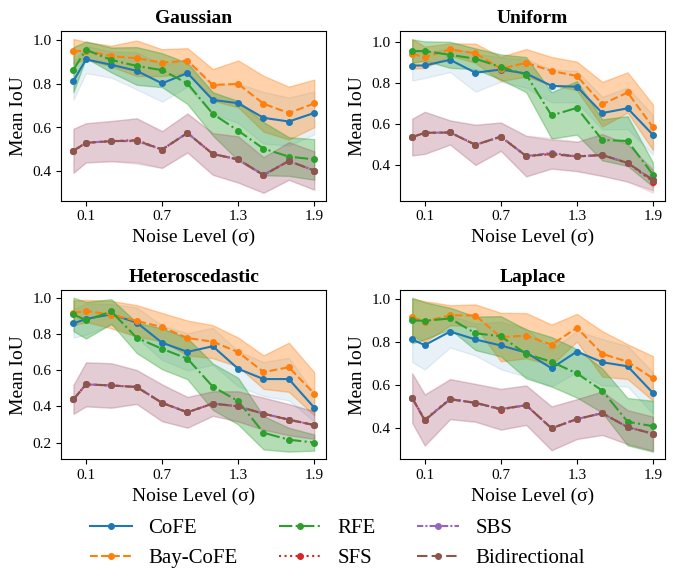

In [3]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import stats  # for t-distribution CI

# ---- Plot configuration ----
mpl.rcParams['font.family'] = 'Liberation Serif'
mpl.rcParams['font.size'] = 15
mpl.rcParams['font.weight'] = 'normal'

# ---- Define all noise types ----
noise_types = ['gaussian', 'uniform', 'heteroscedastic', 'laplace'] #['gaussian', 'uniform', 'heteroscedastic', 'laplace']
sigma_kernel_values = [0.001, 0.1, 0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5, 1.7, 1.9]

# Custom tick positions
custom_xticks = [0.1, 0.7, 1.3, 1.9]

# ---- Figure setup (no shared axes) ----
fig, axes = plt.subplots(2, 2, figsize=(7, 6))
axes = axes.flatten()

# ---- Common line styles ----
line_styles = ['-', '--', '-.', ':', (0, (3, 1, 1, 1)), (0, (5, 2))]

# ---- Loop through noise types ----
for i, noise_type in enumerate(noise_types):
    ax = axes[i]

    try:
        # Load corresponding result file
        pkl_filename = f"/content/drive/MyDrive/PhD/Results/bay_cofe_new/relevant_features/20_runs_feature_relevance_evaluation_{noise_type}1.pkl" # regression
        #f"/content/drive/MyDrive/PhD/Results/bay_cofe_new/relevant_features/20_runs_feature_relevance_evaluation_logistic_{noise_type}_std_3.pkl" # classification

        with open(pkl_filename, 'rb') as f:
            data = pickle.load(f)
        results = data['results']
    except Exception as e:
        print(f"⚠️ Could not load data for {noise_type}: {e}")
        continue

    # Initialize containers
    mean_iou_dict = {method.split('_')[0]: [] for method in results.keys()}
    ci_low_dict   = {method.split('_')[0]: [] for method in results.keys()}
    ci_high_dict  = {method.split('_')[0]: [] for method in results.keys()}

    # Compute mean & 95% CI for each σ
    for sigma in sigma_kernel_values:
        for method in mean_iou_dict.keys():
            possible_keys = [k for k in results.keys() if k.startswith(f"{method}_sigma=")]
            key_match = None
            for k in possible_keys:
                k_val = float(k.split('=')[-1])
                if abs(k_val - sigma) < 1e-6:
                    key_match = k
                    break

            if key_match:
                vals = np.array([x[0] for x in results[key_match]])  # IoU = element [0]
                n = len(vals)
                mean = np.mean(vals)
                std = np.std(vals, ddof=1)
                if n > 1:
                    t_crit = stats.t.ppf(0.975, df=n-1)  # ✅ 99% CI
                    margin = t_crit * std / np.sqrt(n)
                else:
                    margin = 0.0
                mean_iou_dict[method].append(mean)
                ci_low_dict[method].append(mean - margin)
                ci_high_dict[method].append(mean + margin)
            else:
                mean_iou_dict[method].append(np.nan)
                ci_low_dict[method].append(np.nan)
                ci_high_dict[method].append(np.nan)

    # --- Plot Mean IoU with 95% CI shading ---
    for (method, style) in zip(mean_iou_dict.keys(), line_styles):
        means = np.array(mean_iou_dict[method])
        ci_low = np.array(ci_low_dict[method])
        ci_high = np.array(ci_high_dict[method])

        line, = ax.plot(sigma_kernel_values, means, linestyle=style, marker='o', label=method, markersize=4)
        ax.fill_between(
            sigma_kernel_values, ci_low, ci_high,
            color=line.get_color(),
            alpha=0.35 if method == 'Bay-CoFE' or method == 'RFE' else 0.1
        )

    # ---- Axis formatting ----
    ax.set_title(noise_type.capitalize(), fontsize=14, fontweight='bold')
    ax.set_xlabel("Noise Level (σ)", fontsize=14)
    ax.set_ylabel("Mean IoU", fontsize=14)

    # ✅ Custom tick positions and labels
    ax.set_xticks(custom_xticks)
    ax.set_xticklabels([str(s) for s in custom_xticks])
    ax.tick_params(axis='x', labelsize=11)
    ax.tick_params(axis='y', labelsize=11)

# ---- Shared legend ----
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=3, fontsize=15, frameon=False)

# ---- Layout and save ----
plt.tight_layout(rect=[0, 0.1, 1, 1])
plt.savefig("true_feature_iou_gaussian_IoU_Classification.png", dpi=300, bbox_inches='tight')
plt.show()

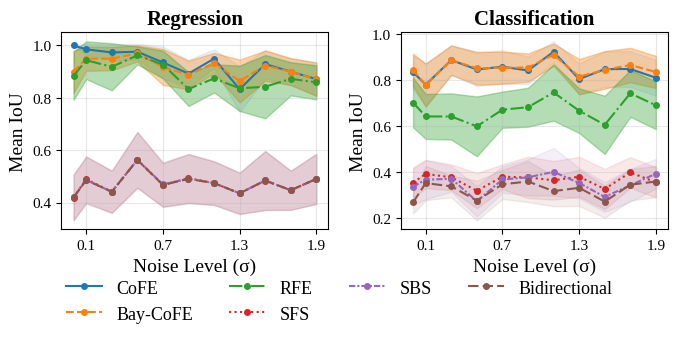

In [1]:
### Correlated noise

import pickle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import stats  # for t-distribution CI

# ---- Plot configuration ----
mpl.rcParams['font.family'] = 'Liberation Serif'
mpl.rcParams['font.size'] = 14
mpl.rcParams['font.weight'] = 'normal'

# ---- Two PKL files (left = Regression, right = Classification) ----
pkl_files = {
    "Regression": "/content/drive/MyDrive/PhD/Results/bay_cofe_new/relevant_features/20_runs_feature_relevance_evaluation_correlated1.pkl",
    "Classification": "/content/drive/MyDrive/PhD/Results/bay_cofe_new/relevant_features/20_runs_feature_relevance_evaluation_logistic_correlated_std_3.pkl"
}

# ---- Common noise levels and ticks ----
sigma_kernel_values = [0.001, 0.1, 0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5, 1.7, 1.9]
custom_xticks = [0.1, 0.7, 1.3, 1.9]
line_styles = ['-', '--', '-.', ':', (0, (3, 1, 1, 1)), (0, (5, 2))]

# ---- Figure setup ----
fig, axes = plt.subplots(1, 2, figsize=(7, 3.5))  # 1 row × 2 columns

for ax, (title, pkl_filename) in zip(axes, pkl_files.items()):
    # Load data
    with open(pkl_filename, 'rb') as f:
        data = pickle.load(f)
    results = data['results']

    # Initialize containers
    mean_iou_dict = {method.split('_')[0]: [] for method in results.keys()}
    ci_low_dict   = {method.split('_')[0]: [] for method in results.keys()}
    ci_high_dict  = {method.split('_')[0]: [] for method in results.keys()}

    # Compute mean and 95% CI
    for sigma in sigma_kernel_values:
        for method in mean_iou_dict.keys():
            possible_keys = [k for k in results.keys() if k.startswith(f"{method}_sigma=")]
            key_match = None
            for k in possible_keys:
                k_val = float(k.split('=')[-1])
                if abs(k_val - sigma) < 1e-6:
                    key_match = k
                    break

            if key_match:
                vals = np.array([x[0] for x in results[key_match]])  # IoU = element [0]
                n = len(vals)
                mean = np.mean(vals)
                std = np.std(vals, ddof=1)
                if n > 1:
                    t_crit = stats.t.ppf(0.975, df=n-1)  # 95% CI
                    margin = t_crit * std / np.sqrt(n)
                else:
                    margin = 0.0
                mean_iou_dict[method].append(mean)
                ci_low_dict[method].append(mean - margin)
                ci_high_dict[method].append(mean + margin)
            else:
                mean_iou_dict[method].append(np.nan)
                ci_low_dict[method].append(np.nan)
                ci_high_dict[method].append(np.nan)

    # ---- Plot Mean IoU with 95% CI shading ----
    for (method, style) in zip(mean_iou_dict.keys(), line_styles):
        means = np.array(mean_iou_dict[method])
        ci_low = np.array(ci_low_dict[method])
        ci_high = np.array(ci_high_dict[method])
        line, = ax.plot(sigma_kernel_values, means, linestyle=style, marker='o', label=method, markersize=4)
        ax.fill_between(
            sigma_kernel_values, ci_low, ci_high,
            color=line.get_color(),
            alpha=0.35 if method in ['Bay-CoFE', 'RFE'] else 0.1
        )

    # ---- Formatting ----
    ax.set_title(title, fontsize=15, fontweight='bold')
    ax.set_xlabel("Noise Level (σ)", fontsize=14)
    ax.set_ylabel("Mean IoU", fontsize=14)
    ax.set_xticks(custom_xticks)
    ax.set_xticklabels([str(s) for s in custom_xticks])
    ax.tick_params(axis='x', labelsize=11)
    ax.tick_params(axis='y', labelsize=11)
    ax.grid(alpha=0.3)

# ---- Shared Legend ----
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=4, fontsize=13, frameon=False)

# ---- Layout and Save ----
plt.tight_layout(rect=[0, 0.12, 1, 1])
plt.savefig("correlated_noise.png", dpi=300, bbox_inches='tight')
plt.show()

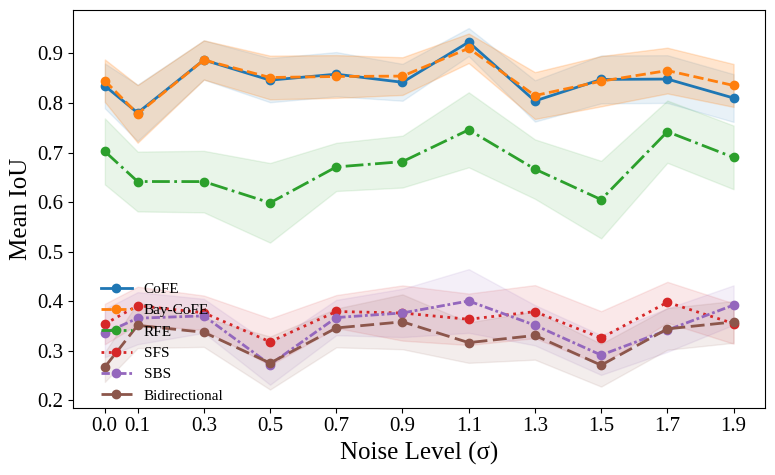

In [ ]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.stats import t


mpl.rcParams['font.family'] = 'Liberation Serif'
mpl.rcParams['font.size'] = 15
mpl.rcParams['font.weight'] = 'normal'

noise_type = 'correlated' # 'correlated' #'heteroscedastic' #'correlated' #'gaussian' #'uniform' # 'gaussian'
num_runs = 20
sigma_kernel_values = [0.001, 0.1, 0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5, 1.7, 1.9]

pkl_filename = f"/content/drive/MyDrive/PhD/Results/bay_cofe_new/relevant_features/20_runs_feature_relevance_evaluation_logistic_{noise_type}_std_3.pkl" # logistic
#f"/content/drive/MyDrive/PhD/Results/bay_cofe_new/relevant_features/20_runs_feature_relevance_evaluation_{noise_type}1.pkl" # Bayesian Ridge Regression


with open(pkl_filename, 'rb') as f:
    data = pickle.load(f)

results = data['results']

# Initialize dicts to store mean and std IoU
mean_iou_dict = {method.split('_')[0]: [] for method in results.keys()}
std_iou_dict  = {method.split('_')[0]: [] for method in results.keys()}

# Compute mean & std IoU for each method across different noise levels
for sigma in sigma_kernel_values:
    for method in mean_iou_dict.keys():
        key = f"{method}_sigma={sigma}"
        if key in results:
            vals = [x[0] for x in results[key]]  # IoU = element 0 and F1 = element 3 in tuple
            mean_iou_dict[method].append(np.mean(vals))
            std_iou_dict[method].append(np.std(vals))
        else:
            mean_iou_dict[method].append(np.nan)
            std_iou_dict[method].append(np.nan)

# --- Plot Mean IoU with std shading ---
plt.figure(figsize=(8, 5))

# Distinct line styles to help differentiate overlapping methods
line_styles = ['-', '--', '-.', ':', (0, (3, 1, 1, 1)), (0, (5, 2))]

for (method, style) in zip(mean_iou_dict.keys(), line_styles):
    means = np.array(mean_iou_dict[method])
    stds  = np.array(std_iou_dict[method])
    line, = plt.plot(sigma_kernel_values, means, linestyle=style, marker='o', label=method, linewidth=2)
    stderr = stds / np.sqrt(num_runs)
    t_val = t.ppf(0.90, df=20)  # for two-sided 95% CI
    stderr = stds / np.sqrt(num_runs)
    lower = means - t_val * stderr
    upper = means + t_val * stderr


    if method == 'Bay-CoFE':
      plt.fill_between(sigma_kernel_values, lower, upper, color=line.get_color(), alpha=0.2)
    else:
      plt.fill_between(sigma_kernel_values, lower, upper, color=line.get_color(), alpha=0.1)

plt.xticks(np.round(sigma_kernel_values, 1))
plt.xlabel("Noise Level (σ)", fontsize=18)
plt.ylabel("Mean IoU", fontsize=18)

# Move legend outside the plot for clarity
plt.legend(bbox_to_anchor=(0.02, 0.35), loc='upper left', fontsize=11, frameon=False)

plt.tight_layout()
plt.savefig('true_feature_iou_gaussian_IoU.png', dpi=300, bbox_inches='tight')
plt.show()

In [13]:
#### differetnt Priors
import os

pkl_filename = '/content/drive/MyDrive/PhD/Results/bay_cofe_new/prior_test/breast_cancer_priortest_baycofe.pkl'
priors = ["laplace", "studentt", "cauchy"]

with open(pkl_filename, 'rb') as f:
    data = pickle.load(f)

In [14]:
import numpy as np
import pandas as pd

def iou_four_sets(a, b, c, d):
    """
    Compute IoU among four sets: intersection of all four divided by union of all four.
    """
    A, B, C, D = set(a), set(b), set(c), set(d)
    union = A | B | C | D
    inter = A & B & C & D
    return len(inter) / len(union) if len(union) > 0 else 0.0


def compute_iou_all4(data):
    """
    Compute IoU(All4) for each run given a dict like:
      data = {
          'gaussian': {'selected': [...]},
          'laplace': {'selected': [...]},
          'studentt': {'selected': [...]},
          'cauchy': {'selected': [...]}
      }
    Returns a DataFrame with per-run IoU(All4) and the mean IoU.
    """
    priors = ['gaussian', 'laplace', 'studentt', 'cauchy']
    n_runs = min(len(data[p]['selected']) for p in priors)

    ious = []
    for r in range(n_runs):
        g = data['gaussian']['selected'][r]
        l = data['laplace']['selected'][r]
        s = data['studentt']['selected'][r]
        c = data['cauchy']['selected'][r]
        iou_val = iou_four_sets(g, l, s, c)
        ious.append(iou_val)

    df = pd.DataFrame({'run': np.arange(1, n_runs + 1), 'IoU(All4)': ious})
    print(df)
    print(f"\nMean IoU(All4) = {np.mean(ious):.4f} ± {np.std(ious):.4f}")
    return df

# --- Example usage ---
df_iou = compute_iou_all4(data)

    run  IoU(All4)
0     1   1.000000
1     2   1.000000
2     3   1.000000
3     4   1.000000
4     5   1.000000
5     6   1.000000
6     7   1.000000
7     8   1.000000
8     9   1.000000
9    10   1.000000
10   11   1.000000
11   12   1.000000
12   13   1.000000
13   14   1.000000
14   15   1.000000
15   16   1.000000
16   17   1.000000
17   18   0.666667
18   19   1.000000
19   20   1.000000

Mean IoU(All4) = 0.9833 ± 0.0726


In [15]:
import numpy as np
import pandas as pd

def summarize_prior_variation(results):
    priors = list(results.keys())
    accs = [np.mean(results[p]['accuracy']) for p in priors]
    accs_stds = np.std(accs)
    ents = [np.mean(results[p]['entropy']) for p in priors]
    ents_stds = np.std(ents)

    #acc_cv = 100 * np.std(accs) / np.mean(accs)
    #ent_cv = 100 * np.std(ents) / np.mean(ents)

    print("Mean accuracy per prior:", np.round(accs, 3))
    print("Mean sign entropy per prior:", np.round(ents, 3))
    print(f"\nCoefficient of variation (accuracy): {accs_stds:.2f}%")
    print(f"Coefficient of variation (entropy): {ents_stds:.2f}%")

    summary = pd.DataFrame({
        "Prior": priors,
        "Mean Accuracy": np.round(accs, 3),
        "Std Accuracy": np.round(accs_stds, 8),
        "Mean Entropy": np.round(ents, 3),
        "Std Entropy": np.round(ents_stds, 3)
    })
    print("\n--- Prior-wise stability summary ---")
    print(summary.to_string(index=False))
    return summary

In [16]:
summary = summarize_prior_variation(data)

Mean accuracy per prior: [0.964 0.963 0.964 0.963]
Mean sign entropy per prior: [0. 0. 0. 0.]

Coefficient of variation (accuracy): 0.00%
Coefficient of variation (entropy): 0.00%

--- Prior-wise stability summary ---
   Prior  Mean Accuracy  Std Accuracy  Mean Entropy  Std Entropy
gaussian          0.964      0.000789           0.0          0.0
 laplace          0.963      0.000789           0.0          0.0
studentt          0.964      0.000789           0.0          0.0
  cauchy          0.963      0.000789           0.0          0.0


In [ ]:
summary

,Prior,Mean Accuracy,Std Accuracy,Mean Entropy,Std Entropy
0,gaussian,0.925,0.0,0.016,0.003
1,laplace,0.924,0.0,0.007,0.003
2,studentt,0.924,0.0,0.015,0.003
3,cauchy,0.924,0.0,0.015,0.003
